In [29]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt


In [30]:

# Step 2: Load the Data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [31]:

# Step 3: Merge the Datasets on 'CustomerID'
customer_data = pd.merge(transactions, customers, on='CustomerID')


In [32]:
# Step 4: Feature Engineering
customer_summary = customer_data.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    Frequency=('TransactionID', 'count'),
    AverageTransactionValue=('TotalValue', 'mean')
).reset_index()

In [33]:
# Step 5: Standardize the Features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary[['TotalSpent', 'Frequency', 'AverageTransactionValue']])


In [34]:

# Step 6: Apply K-Means Clustering for Different Numbers of Clusters (2-10)
n_clusters_range = range(2, 11)
scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_summary['Cluster'] = kmeans.fit_predict(scaled_data)
    
    # Calculate Davies-Bouldin Index and Silhouette Score
    db_index = davies_bouldin_score(scaled_data, customer_summary['Cluster'])
    silhouette = silhouette_score(scaled_data, customer_summary['Cluster'])
    
    scores.append((n_clusters, db_index, silhouette))


In [37]:
# Step 7: Select the Best Number of Clusters (Based on DB Index and Silhouette Score)
best_clusters = min(scores, key=lambda x: x[1])  # Minimize DB Index
print(f"Optimal Number of Clusters: {best_clusters[0]}")
print(f"DB Index: {best_clusters[1]:.3f}")
print(f"Silhouette Score: {best_clusters[2]:.3f}")


Optimal Number of Clusters: 8
DB Index: 0.811
Silhouette Score: 0.358


In [38]:
# Step 8: Perform PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

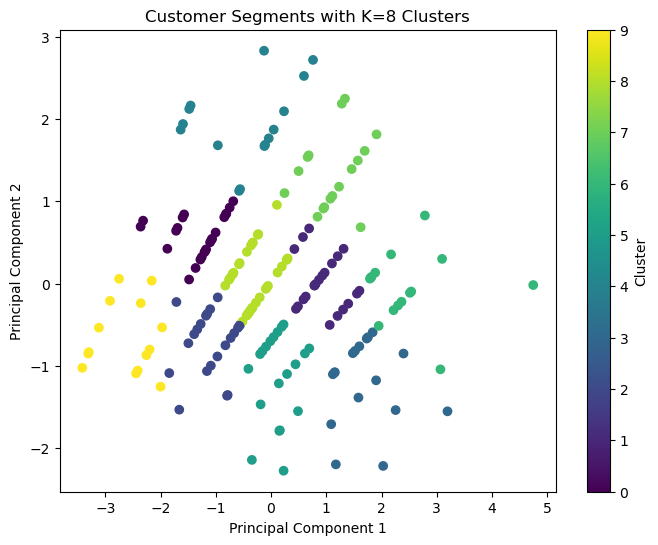

In [39]:
# Step 9: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_summary['Cluster'], cmap='viridis')
plt.title(f"Customer Segments with K={best_clusters[0]} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [40]:






# Step 10: Insights (Add your business-specific insights here)
print("Cluster Insights:")
for cluster_num in range(best_clusters[0]):
    cluster_data = customer_summary[customer_summary['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(f"  Number of Customers: {len(cluster_data)}")
    print(f"  Average Total Spent: ${cluster_data['TotalSpent'].mean():.2f}")
    print(f"  Average Frequency: {cluster_data['Frequency'].mean():.2f}")
    print(f"  Average Average Transaction Value: ${cluster_data['AverageTransactionValue'].mean():.2f}")
    print("-" * 40)



Cluster Insights:
Cluster 0:
  Number of Customers: 23
  Average Total Spent: $1774.70
  Average Frequency: 2.61
  Average Average Transaction Value: $673.10
----------------------------------------
Cluster 1:
  Number of Customers: 22
  Average Total Spent: $4751.90
  Average Frequency: 6.14
  Average Average Transaction Value: $776.74
----------------------------------------
Cluster 2:
  Number of Customers: 22
  Average Total Spent: $2034.02
  Average Frequency: 4.59
  Average Average Transaction Value: $445.96
----------------------------------------
Cluster 3:
  Number of Customers: 17
  Average Total Spent: $5536.51
  Average Frequency: 8.82
  Average Average Transaction Value: $632.12
----------------------------------------
Cluster 4:
  Number of Customers: 15
  Average Total Spent: $2478.31
  Average Frequency: 2.33
  Average Average Transaction Value: $1047.39
----------------------------------------
Cluster 5:
  Number of Customers: 20
  Average Total Spent: $3365.68
  Avera